# Radiation Transport Development
| Author  | Stanley A. Baronett  |
|---------|----------------------|
| Created |  09/29/2023          |
| Updated |  10/06/2023          |

## [Quantities](https://github.com/PrincetonUniversity/athena/wiki/Non-relativistic-Radiation-Transport#units)

- Code Units
  - Temperature $T_0$
  - Density $\rho_0$
  - Length $L_0$
  - Time $t_0 = L_0 / v_0 = \mathbb{C}L_0 / c$
- Ideal Gas
  - Constant mean molecular weight $\mu$
  - Velocity $v_0 = \sqrt{k_\mathrm{B} T_0 / (\mu m_\mathrm{p})}$
  - Pressure $P_0 \equiv k_\mathrm{B}\rho_0 T_0 / (\mu m_\mathrm{p})$
  - Internal energy $E_\mathrm{g} = P/(\gamma_\mathrm{g} - 1)$ for adiabatic index $\gamma_\mathrm{g} \neq 1$
  - Temperature $T = P/(R_\mathrm{ideal}\rho) = E_\mathrm{g}(\gamma_\mathrm{g} - 1)/(R_\mathrm{ideal}\rho)$
- Radiation
  - Specific intensity $I\,[a_\mathrm{r}T_0^4]$
  - Energy density $E_\mathrm{r} = \int I\mathrm{d}\Omega$ (taking $4\pi = 1$)
  - Flux $\mathbf{F}_\mathrm{r} = \int\mathbf{n}I\mathrm{d}\Omega$ (units of $ca_\mathrm{r}T_0^4$)
- Dimensionless
  - $\mathbb{C} \equiv \mathcal{C} \equiv c/v_0$
  - $\mathbb{P} \equiv \mathcal{P} \equiv a_\mathrm{r}T_0^4 / P_0 = a_\mathrm{r}T_0^4 / (\rho_0 R_\mathrm{ideal} T_0)$
- Sums
  - Total pressure (energy) $P_\mathrm{g} + \mathbb{P}P_\mathrm{r}\,[P_0]$
  - Total momentum $\rho v + F_\mathrm{r}\mathbb{P}/\mathbb{C}\,[\rho_0 v_0]$


## Stellar Surface

### Total surface emission

```
nzeta       = 1                   # number of polar angles (0 to pi/2)
npsi        = 2                   # number of azimuthal angles (0 to pi)
```
![Total surface emission](stellar_surface/nzeta1/tot_surf/figs/slice.png)

### Isotropic emission only at $\theta=\pi/2$

```
nzeta       = 1                   # number of polar angles (0 to pi/2)
npsi        = 2                   # number of azimuthal angles (0 to pi)
```
![Emission only at $\theta=\pi/2$](stellar_surface/nzeta1/theta0.5pi/figs/slice.png)

### Most-radial emission only at $\theta=\pi/2$

```
nzeta       = 5                   # number of polar angles (0 to pi/2)
npsi        = 2                   # number of azimuthal angles (0 to pi)
```
#### Single ray
![Emission only at $\theta=\pi/2$](stellar_surface/nzeta5/theta0.5pi_radial/figs/slice.old.png)
#### All most radial rays
![Emission only at $\theta=\pi/2$](stellar_surface/nzeta5/theta0.5pi_radial/figs/slice.png)

### Most-radial emission only at $\theta=\pi/2$

```
nzeta       = 6                   # number of polar angles (0 to pi/2)
npsi        = 4                   # number of azimuthal angles (0 to pi)
```
#### Single ray
![Emission only at $\theta=\pi/2$](stellar_surface/nzeta6-npsi4/theta0.5pi_radial/figs/slice.old.png)
#### All most radial rays
![Emission only at $\theta=\pi/2$](stellar_surface/nzeta6-npsi4/theta0.5pi_radial/figs/slice.png)

## Stellar Flux

### Equations

\begin{align*}
  \frac{P(r, \theta)}{r} &= \frac{P_0}{r_0}\left(\frac{r}{r_0}\sin\theta\right)^{-1/2} \\
  \rho_\mathrm{mid}(r, \theta) &= \rho_0\left(\frac{r}{r_0}\sin\theta\right)^{-9/4}\exp\left(-\frac{r}{r_0 r_c}\sin\theta\right) \\
  \rho(r, \theta) &= \rho_\mathrm{mid}(r,\theta)\exp\left[\frac{GM_0}{P(r,\theta)}\left(1 - \frac{1}{\sin\theta}\right)\right] \\
  \mathrm{d}\tau_* &= \rho(r, \theta)\kappa_*\mathrm{d}r \\
  \tau_*(\theta) &= \int_r \mathrm{d}\tau_* \\
  F_*(r, \theta) &= \left(\frac{R_*}{r}\right)^2\frac{1}{4}\mathbb{CP}T_*^4\left(1 - \exp\left[-\tau_*(\theta)\right]\right)
\end{align*}

/tmp/ipykernel_21173/129440411.py:84: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(x1f, x2v, np.log10(F_star))


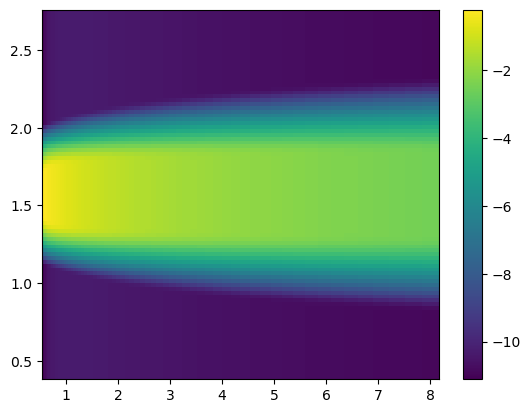

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# stellar_flux.cpp
# //---------------------------------------------------------------------------
# //! computes density in spherical coordinates

def DenProfileSph(r, theta, phi):
  rad = r*np.sin(theta)
  p_over_r = PoverR(r, theta)
  denmid = rho0*np.power(rad/r0, dslope) #*np.exp(-r*np.sin(theta)/r0/r_c)
  dentem = denmid*np.exp(gm0/p_over_r*(1./r - 1./rad))
  den = dentem
  return den

# //----------------------------------------------------------------------------------------
# //! computes pressure/density in spherical coordinates

def PoverR(r, theta):
  rad = r*np.sin(theta)
  poverr = p0_over_r0*np.power(rad/r0, pslope)
  return poverr


# athinput.stellar_flux
# <mesh>
nx1          = 64                  # Number of zones in X1-direction
x1min        = 0.54                # minimum value of X1
x1max        = 8.0                 # maximum value of X1

nx2          = 96                  # Number of zones in X2-direction
x2min        = 0.3831043444619522  # minimum value of X2
x2max        = 2.758488309127841   # maximum value of X2

# <hydro>
dfloor       = 1e-12               # minimum density

# <radiation>
prat         = 1.13e3              # $a_rT_0^4/P_0$
crat         = 6.36e4              # $c/v_0$
unit         = 1                   # adopt the units in the input file
T_unit       = 6.14e3              # T_0 [K]
density_unit = 4.28e-14            # \rho_0 [g/cm^3]
length_unit  = 5.98e14             # L_0 [cm]

# <problem>
GM           = 1.0                 # gravitational potential
r0           = 1.0
rho0         = 1.0                 # [\rho_0]
p0_over_r0   = 4.80e-03
pslope       = -0.5                # pressure power-law index
dslope       = -2.25               # density power-law index
# end athinput.stellar_flux 

# extra quantities
kappa_star_cgs    = 10
# r_c               = 2.5            # exponential taper
dgratio           = 100            # dust-to-gas ratio
small_grain_ratio = 0.02184
t_star            = 9.42e-1        # [T_0]
r_star            = 1.16e-4        # [L_0]
# the total stellar luminosity is 1 Lsun

# Get from .athdf snapshot
x1f = np.logspace(np.log10(x1min), np.log10(x1max), nx1+1, dtype=np.float64)
x1v = np.sqrt(x1f[:-1]*x1f[1:])
x2f = np.linspace(x2min, x2max, nx2+1, dtype=np.float64)
x2v = 0.5*(x2f[:-1]+x2f[1:])
X1V, X2V = np.meshgrid(x1v, x2v)

# void Mesh::InitUserMeshData(ParameterInput *pin) {
# // Get parameters for gravitatonal potential of central point mass
gm0 = GM # gm0 = pin->GetOrAddReal("problem","GM",0.0);
rho_extend = np.zeros((nx2, nx1+1), dtype=np.float64)
rho_extend[:, 0] = 0
rho_extend[:, 1:] = DenProfileSph(X1V, X2V, 0) # or read in from your code
rho_extend[rho_extend<dfloor] = dfloor

kappa_star = kappa_star_cgs*dgratio*small_grain_ratio*density_unit*length_unit
dx1 = np.concatenate(([0], np.diff(x1f)))
dtau_star = kappa_star*dx1[None, :]*rho_extend
tau_star  = np.cumsum(dtau_star, axis=1)
F_star = (r_star/x1f)**2*(0.25*crat*prat)*t_star**4*(1-np.exp(-tau_star))

plt.pcolormesh(x1f, x2v, np.log10(F_star))
plt.colorbar()

In [3]:
kappa_star

558.9816959999999

/tmp/ipykernel_21173/906973358.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(x1v, x2v, np.log10(divF_star))
/tmp/ipykernel_21173/906973358.py:3: RuntimeWarning: invalid value encountered in log10
  plt.pcolormesh(x1v, x2v, np.log10(divF_star))


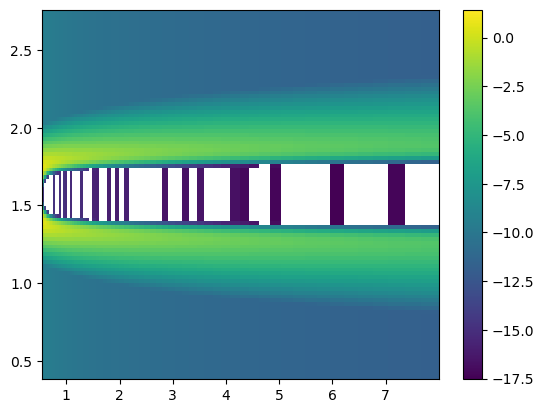

In [4]:
divF_star = np.diff(x1f[None, :]**2 * F_star, axis=1) / np.diff(x1f[None, :], axis=1) / (x1v[None, :]**2)

plt.pcolormesh(x1v, x2v, np.log10(divF_star))
plt.colorbar()

### Light-crossing Time

Assuming $L_r$ is the radial extent of the domain,
\begin{align*}
    t_\mathrm{cross} &= \frac{L_r}{c} \\
    \frac{t_\mathrm{cross}}{t_0} &= \frac{L_r}{\mathbb{C} L_0},
\end{align*}
since $t_0 = \mathbb{C}L_0/c$.

In [5]:
#==============================================================================
import sys
sys.path.insert(0, '/home/stanley/github/PrincetonUniversity/athena/vis/python')
import athena_read
import numpy as np

npsi = 4
nzeta = 5
problem_id = 'stellar_flux'

# Read and compute
path = f'npsi{npsi}/nzeta{nzeta}'
athinput = athena_read.athinput(f'{path}/athinput.{problem_id}')
Lr = athinput['mesh']['x1max'] - athinput['mesh']['x1min']
crat = athinput['radiation']['crat']
L0 = athinput['radiation']['length_unit']
t_cross = Lr/crat/L0
print(f't_cross/t₀ = {t_cross:.2e}')


FileNotFoundError: [Errno 2] No such file or directory: 'npsi4/nzeta5/athinput.stellar_flux'

## Appendix

### Single Beam (`gid == 0`)

In [ ]:
#==============================================================================
import sys
sys.path.insert(0, '/home/stanley/github/PrincetonUniversity/athena/vis/python')
import athena_read
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

wd = 'beam_gid0'
offset = 0.1
vmin, vmax = 0.05, 2
fig, ax = plt.subplots(figsize=(4.68, 9), dpi=90)

# Read and plot
path = f'{wd}'
athinput = athena_read.athinput(f'{path}/athinput.beam_gid0')
pid = athinput['job']['problem_id']
nmu = athinput['radiation']['nmu']
octnum = athinput['problem']['octnum']
zone_index = athinput['problem']['zone_index']
athdf = athena_read.athdf(f'{path}/athdf/{pid}.out1.00001.athdf')
t = athdf['Time']
clip = np.clip(athdf['Er'][0], vmin, vmax)
Er = ax.pcolormesh(athdf['x1v'], athdf['x2v'], clip, cmap='plasma',
                   norm=colors.LogNorm())

# Format (sub)plots
cb_Er = plt.colorbar(Er, label='$E_\mathrm{r}/(a_\mathrm{r}T_0^4)$')
ax.minorticks_on()
ax.set_title(f'$n_\mu={nmu}$, $t={t:.0f}t_0$\noctnum={octnum}, zone_index={zone_index}')
ax.set(aspect='equal', xlabel='$x/L_0$', ylabel='$y/L_0$')
ax.tick_params(axis='both', which='both', top=True, right=True)

### Rotated single Beam (`gid == 0`)
- Try fixing for-loop indices in `TwoBeamHydro()`